## Cohort Retention Analysis

__Question Statement__


Using the provided dataset, please create  __cohort retention rate graph based on customer acquisition month with monthly period__. 

Acquisition month is defined as the first order month of the user. 
Please determine the metric you use, give some analysis and business recommendations to Kulina based on the visualization.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
df = pd.read_csv('./kulina-data/Data Visualization/dataset.csv', parse_dates=['order_date'])

In [3]:
df.head(10)

,id,order_date,user_id
0,114363,2019-01-01,53424
1,114364,2019-01-01,77226
2,114366,2019-01-01,67632
3,114369,2019-01-01,63167
4,114370,2019-01-01,32047
5,114373,2019-01-01,27840
6,114375,2019-01-01,77188
7,114376,2019-01-01,57982
8,114377,2019-01-01,51210
9,114378,2019-01-01,79399


In [4]:
df.shape

(192913, 3)

In [5]:
df.isnull().sum()

id            0
order_date    0
user_id       0
dtype: int64

In [6]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype,
                   df[col].isna().sum(),
                   round((df[col].isna().sum()/len(df[col])) *100, 2),
                   df[col].nunique(), list(df[col].unique()[:2])]);

statdesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

In [7]:
statdesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.0,192913,"[114363, 114364]"
1,order_date,datetime64[ns],0,0.0,361,"[2019-01-01T00:00:00.000000000, 2019-01-02T00:..."
2,user_id,int64,0,0.0,28131,"[53424, 77226]"


In [8]:
# df[df['id']==192913]

### id == row

### order_date unique values = 361, almost a year.

,id,order_date,user_id
67325,192913,2019-06-16,89743


In [9]:
df['user_id'].duplicated().sum()

164782

In [10]:
df2 = df.copy()
df2.head()

,id,order_date,user_id
0,114363,2019-01-01,53424
1,114364,2019-01-01,77226
2,114366,2019-01-01,67632
3,114369,2019-01-01,63167
4,114370,2019-01-01,32047


In [11]:
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

In [12]:
df2['OrderMonth'] = df2['order_date'].apply(get_month)
df2['CohortMonth'] = df2.groupby('user_id')['OrderMonth'].transform('min')

df2.head()

,id,order_date,user_id,OrderMonth,CohortMonth
0,114363,2019-01-01,53424,2019-01-01,2019-01-01
1,114364,2019-01-01,77226,2019-01-01,2019-01-01
2,114366,2019-01-01,67632,2019-01-01,2019-01-01
3,114369,2019-01-01,63167,2019-01-01,2019-01-01
4,114370,2019-01-01,32047,2019-01-01,2019-01-01


In [13]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [16]:
order_year, order_month, _ = get_date(df2, 'OrderMonth')
cohort_year, cohort_month, _ = get_date(df2, 'CohortMonth')

year_diff = order_year - cohort_year
month_diff = order_month - cohort_month

df2['CohortIndex'] = year_diff * 12 + month_diff + 1
df2.head()

,id,order_date,user_id,OrderMonth,CohortMonth,CohortIndex
0,114363,2019-01-01,53424,2019-01-01,2019-01-01,1
1,114364,2019-01-01,77226,2019-01-01,2019-01-01,1
2,114366,2019-01-01,67632,2019-01-01,2019-01-01,1
3,114369,2019-01-01,63167,2019-01-01,2019-01-01,1
4,114370,2019-01-01,32047,2019-01-01,2019-01-01,1


In [19]:
### Create a cohort table
cohort_data = df2.groupby(['CohortMonth', 'CohortIndex'])['user_id'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'user_id')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,4520.0,2093.0,1673.0,1342.0,1066.0,1201.0,1168.0,917.0,763.0,653.0,626.0,486.0
2019-02-01,2466.0,1024.0,611.0,483.0,494.0,464.0,347.0,283.0,253.0,232.0,175.0,NaN
2019-03-01,2662.0,927.0,588.0,558.0,518.0,383.0,330.0,309.0,260.0,216.0,NaN,NaN
2019-04-01,2074.0,709.0,541.0,477.0,333.0,264.0,233.0,205.0,168.0,NaN,NaN,NaN
2019-05-01,2616.0,786.0,560.0,368.0,292.0,248.0,195.0,161.0,NaN,NaN,NaN,NaN
2019-06-01,2802.0,1200.0,667.0,492.0,428.0,374.0,295.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,3234.0,1356.0,902.0,729.0,610.0,487.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,2080.0,874.0,602.0,476.0,395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,1697.0,675.0,473.0,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the results above, the first column in the chart is showing the active user number on that specific month.
The columns following that show how many remaining users are still using the service on the next following months.

We can see that in the first month (January) there are about 4520 active user. The number of user dropped almost half in the 2nd month (2093).
By the end of the year, only 10% of the users are still active.

In [33]:
# Total number of active users in December 2019:

916+527+405+358+395+487+295+161+168+216+175+486

4589

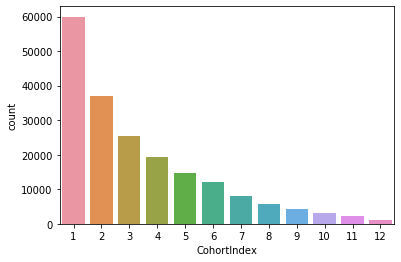

In [41]:
sns.countplot(df2['CohortIndex'])

In [34]:
### Cohort vs retention metrics
### To show retention rate in percentiles

cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,100.0,46.3,37.0,29.7,23.6,26.6,25.8,20.3,16.9,14.4,13.8,10.8
2019-02-01,100.0,41.5,24.8,19.6,20.0,18.8,14.1,11.5,10.3,9.4,7.1,NaN
2019-03-01,100.0,34.8,22.1,21.0,19.5,14.4,12.4,11.6,9.8,8.1,NaN,NaN
2019-04-01,100.0,34.2,26.1,23.0,16.1,12.7,11.2,9.9,8.1,NaN,NaN,NaN
2019-05-01,100.0,30.0,21.4,14.1,11.2,9.5,7.5,6.2,NaN,NaN,NaN,NaN
2019-06-01,100.0,42.8,23.8,17.6,15.3,13.3,10.5,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,41.9,27.9,22.5,18.9,15.1,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,42.0,28.9,22.9,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,39.8,27.9,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# pip install matplotlib==3.0.3

     |████████████████████████████████| 14.3MB 14kB/s eta 0:00:01
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
Note: you may need to restart the kernel to use updated packages.


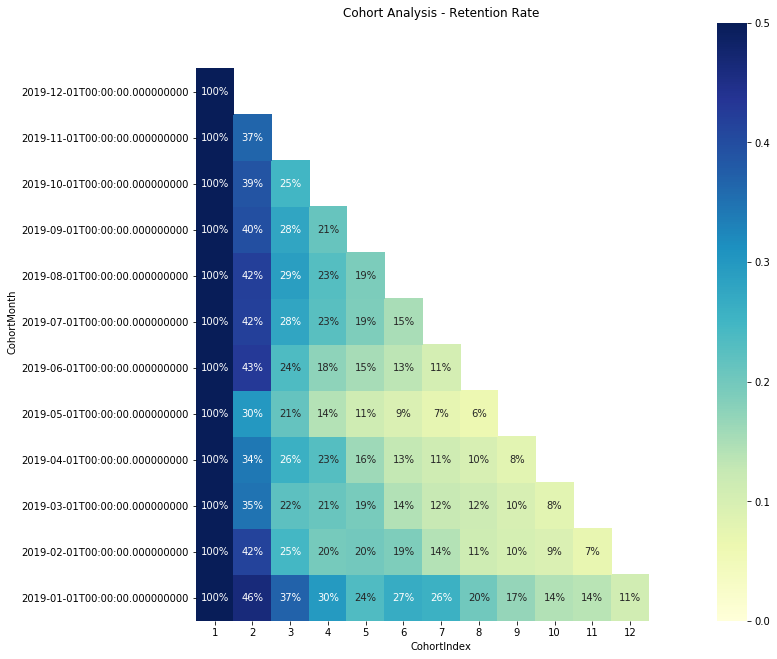

In [30]:
### Visualize with heatmap
plt.figure(figsize = (11,11))
plt.title('Cohort Analysis - Retention Rate')

sns.heatmap(
    data = retention, 
    annot = True, 
    fmt = '.0%', 
    vmin = 0.0,
    vmax = 0.5,
    cmap = "YlGnBu",
    xticklabels=True,
    yticklabels=True
        )
ax = plt.gca()
ax.set_xlim(0,13)
ax.set_ylim(0,13)

plt.show()

As we can see from the graph, the retention drops steadily from 100% to 46% until the lowest 24% which is in 2019/5, however in 2019/6 and 2019/7 it increases again to 27% and 26% respectively. This means that the campaigns used on that month might have to be investigated more and be reused or optimized to prevent the significant drop that occurred after 2019/8, which after 20% in 2019/8 kept dropping until the lowest which is 11% in 2019/12.

A consultation with marketing analysts or product analysts might give further insights on this occurrence.

The high amount of orders in the Q1 is most probably due to the "new year" effects, making people subconsciously spent more. However, as it drops before it increases a little in 2019/6, there might be some marketing campaigns that worked and can be implemented once more in the future.

My prediction is probably due to Fasting Month that occurred in May in 2019, which also influences the decrease in orders, and it increases again right after Eid Day. Perhaps due to the consumption behavior after a month of not being able to eat whenever, and after Eid most employees received holiday bonuses. This is considering the majority of people in Indonesia is Moslem. 
With more features that detailed the Age, Job, and Location of the user might help a lot in investigating more about this behavior.

Also, perhaps Kulina should allocate the marketing campaigns from Q1 to Q3 or Q4, for example making the yearly plans as 20% for Q1, 15% for Q2, 25% for Q3, and 40% for Q4, thus making it possible to have higher retention by the end of the year. In conclusion, it is required to increase churn more in the longterm.

In [42]:
###### Next: Check the retention rate for daily, and weekly.